<a href="https://colab.research.google.com/github/christedjo28/H8_36/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Impact factor of top 1000 journals

About this file
Contains Ratings from the year 2013-2019. Further details of each columns are:

1. **Source title**: Journal title.
2. **CiteScore**: Impact factor ratings.
3. **Highest percentile**: Highest percentile in the category of journal.
4. **201(x-3)-1x Citations**: Last 3 years citations of the journal.
5. **201(x-3)-1x Documents**: Documents, such as articles, added in the journal in the last 3 years.
6. **% Cited**: Percentage cited as compare to the previous year.
7. **Source-Normalized Impact per Paper (SNIP)**: Measures contextual citation impact by weighting citations based on the total number of citations in a subject field.
8. **The SCImago Journal Rank (SJR)**: Is a measure of the scientific influence of scholarly journals that accounts for both the number of citations received by a journal and the importance or prestige of the journals where the citations come from.
9. **Publisher**: Name of the publisher of the journal.

In [1]:
import numpy as np
import pandas as pd

## Import Data dari Kaggle
#### Impact factor of top 1000 journals

In [2]:
df19 = pd.read_excel('drive/My Drive/Colab Notebooks/datasets/datasets_813339_1393157_Impact-Factor-Ratings.xlsx', '2019')
df18 = pd.read_excel('drive/My Drive/Colab Notebooks/datasets/datasets_813339_1393157_Impact-Factor-Ratings.xlsx', '2018')
df17 = pd.read_excel('drive/My Drive/Colab Notebooks/datasets/datasets_813339_1393157_Impact-Factor-Ratings.xlsx', '2017')
df16 = pd.read_excel('drive/My Drive/Colab Notebooks/datasets/datasets_813339_1393157_Impact-Factor-Ratings.xlsx', '2016')
df15 = pd.read_excel('drive/My Drive/Colab Notebooks/datasets/datasets_813339_1393157_Impact-Factor-Ratings.xlsx', '2015')

In [3]:
df19.head()

,Source title,CiteScore,Highest percentile,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR,Publisher
0,Ca-A Cancer Journal for Clinicians,435.4,99.0%\n1/331\nOncology,47455,109,94,113.744,88.192,Wiley-Blackwell
1,MMWR Recommendations and Reports,152.5,99.0%\n1/275\nHealth (social science),2288,15,87,37.543,41.022,Centers for Disease Control and Prevention (CDC)
2,Nature Reviews Materials,123.7,99.0%\n1/287\nMaterials Chemistry,23868,193,96,15.261,36.691,Springer Nature
3,Chemical Reviews,100.5,99.0%\n1/398\nGeneral Chemistry,97295,968,96,12.832,20.847,American Chemical Society
4,Reviews of Modern Physics,75.8,99.0%\n1/224\nGeneral Physics and Astronomy,11906,157,92,14.948,21.938,American Physical Society


In [4]:
df19.isnull().sum()

Source title           0
CiteScore              0
Highest percentile     0
2016-19 Citations      0
2016-19 Documents      0
% Cited                0
SNIP                  12
SJR                    6
Publisher              5
dtype: int64

### Cleaning Data

In [5]:
df19['SNIP'].fillna(0, inplace=True)

In [6]:
df19['SJR'].fillna(0, inplace=True)

In [7]:
df19.isnull().sum()

Source title          0
CiteScore             0
Highest percentile    0
2016-19 Citations     0
2016-19 Documents     0
% Cited               0
SNIP                  0
SJR                   0
Publisher             5
dtype: int64

In [8]:
df19.describe()

,CiteScore,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,16.536100,15530.370000,1039.365000,86.696000,3.386423,4.307486
std,17.658969,30068.973832,1891.849663,6.884837,4.397953,4.821364
min,8.800000,49.000000,5.000000,44.000000,0.000000,0.000000
25%,10.075000,2331.500000,166.500000,84.000000,1.905250,2.051000
50%,12.200000,6692.000000,459.500000,88.000000,2.560500,2.992500
75%,17.100000,14797.250000,1015.250000,91.000000,3.777500,4.891000
max,435.400000,333517.000000,18838.000000,100.000000,113.744000,88.192000


In [9]:
df19e = df19
df19e[['Highest percentile','FieldID','Field']] = df19['Highest percentile'].str.split('\n',expand=True)

In [10]:
df19e.head()

,Source title,CiteScore,Highest percentile,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR,Publisher,FieldID,Field
0,Ca-A Cancer Journal for Clinicians,435.4,99.0%,47455,109,94,113.744,88.192,Wiley-Blackwell,1/331,Oncology
1,MMWR Recommendations and Reports,152.5,99.0%,2288,15,87,37.543,41.022,Centers for Disease Control and Prevention (CDC),1/275,Health (social science)
2,Nature Reviews Materials,123.7,99.0%,23868,193,96,15.261,36.691,Springer Nature,1/287,Materials Chemistry
3,Chemical Reviews,100.5,99.0%,97295,968,96,12.832,20.847,American Chemical Society,1/398,General Chemistry
4,Reviews of Modern Physics,75.8,99.0%,11906,157,92,14.948,21.938,American Physical Society,1/224,General Physics and Astronomy


In [11]:
df19e.isnull().sum()

Source title          0
CiteScore             0
Highest percentile    0
2016-19 Citations     0
2016-19 Documents     0
% Cited               0
SNIP                  0
SJR                   0
Publisher             5
FieldID               0
Field                 0
dtype: int64

In [12]:
df_category = df19e.Field.value_counts()

In [13]:
df_category.head()

Biochemistry                                    20
Cardiology and Cardiovascular Medicine          20
Oncology                                        20
Ecology, Evolution, Behavior and Systematics    17
General Medicine                                17
Name: Field, dtype: int64

In [14]:
cit_field = df19e.groupby('Field')['CiteScore'].mean()
print(cit_field.head())

Field
                                    23.742857
Accounting                           9.750000
Acoustics and Ultrasonics           11.800000
Advanced and Specialized Nursing    16.150000
Aerospace Engineering               13.050000
Name: CiteScore, dtype: float64


In [15]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
df19e.set_index('Field', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df19e.head()

,Source title,CiteScore,Highest percentile,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR,Publisher,FieldID
Field,,,,,,,,,,
Oncology,Ca-A Cancer Journal for Clinicians,435.4,99.0%,47455,109,94,113.744,88.192,Wiley-Blackwell,1/331
Health (social science),MMWR Recommendations and Reports,152.5,99.0%,2288,15,87,37.543,41.022,Centers for Disease Control and Prevention (CDC),1/275
Materials Chemistry,Nature Reviews Materials,123.7,99.0%,23868,193,96,15.261,36.691,Springer Nature,1/287
General Chemistry,Chemical Reviews,100.5,99.0%,97295,968,96,12.832,20.847,American Chemical Society,1/398
General Physics and Astronomy,Reviews of Modern Physics,75.8,99.0%,11906,157,92,14.948,21.938,American Physical Society,1/224


### Jurnal dikelompokkan ke dalam bidang/fieldnya

In [17]:
df19e.sort_values(['CiteScore'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df19e.head()

df_top5.head()

,Source title,CiteScore,Highest percentile,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR,Publisher,FieldID
Field,,,,,,,,,,
Oncology,Ca-A Cancer Journal for Clinicians,435.4,99.0%,47455,109,94,113.744,88.192,Wiley-Blackwell,1/331
Health (social science),MMWR Recommendations and Reports,152.5,99.0%,2288,15,87,37.543,41.022,Centers for Disease Control and Prevention (CDC),1/275
Materials Chemistry,Nature Reviews Materials,123.7,99.0%,23868,193,96,15.261,36.691,Springer Nature,1/287
General Chemistry,Chemical Reviews,100.5,99.0%,97295,968,96,12.832,20.847,American Chemical Society,1/398
General Physics and Astronomy,Reviews of Modern Physics,75.8,99.0%,11906,157,92,14.948,21.938,American Physical Society,1/224


In [18]:
# group countries by field and apply sum() function 
df_field = df19e.groupby('Field', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df19e.groupby('Field', axis=0)))

df_field.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,CiteScore,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR
Field,,,,,,
,166.2,741179,26682,589,28.500,43.133
Accounting,19.5,4049,408,162,10.598,24.130
Acoustics and Ultrasonics,11.8,21173,1798,88,1.977,1.493
Advanced and Specialized Nursing,32.3,48806,3357,167,6.857,9.577
Aerospace Engineering,26.1,44972,4070,168,8.897,4.152


In [19]:
df_field

,CiteScore,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR
Field,,,,,,
,166.2,741179,26682,589,28.500,43.133
Accounting,19.5,4049,408,162,10.598,24.130
Acoustics and Ultrasonics,11.8,21173,1798,88,1.977,1.493
Advanced and Specialized Nursing,32.3,48806,3357,167,6.857,9.577
Aerospace Engineering,26.1,44972,4070,168,8.897,4.152
...,...,...,...,...,...,...
Transportation,31.4,3156,212,172,7.711,9.287
Urology,52.7,42959,2601,245,10.373,12.211
Virology,20.5,4983,491,168,3.183,6.432


In [20]:
# group countries by field and apply sum() function 
df_pub = df19e.groupby('Publisher', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df19e.groupby('Publisher', axis=0)))

df_pub.head(200)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,CiteScore,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR
Publisher,,,,,,
ACM,38.6,25471,2021,231,13.795,7.575
APA,108.3,24586,1967,712,35.965,42.706
ASME,11.2,730,65,85,3.714,1.580
Academy of Management,49.1,9166,612,273,17.930,31.267
American Academy of Pediatrics,9.6,24433,2558,82,2.690,2.772
...,...,...,...,...,...,...
Wiley-Blackwell,1986.0,1594840,101565,10377,413.037,512.360
Wolters Kluwer Health,163.4,214991,16075,1064,34.526,44.503
World Health Organization,10.2,1577,155,81,0.000,1.931


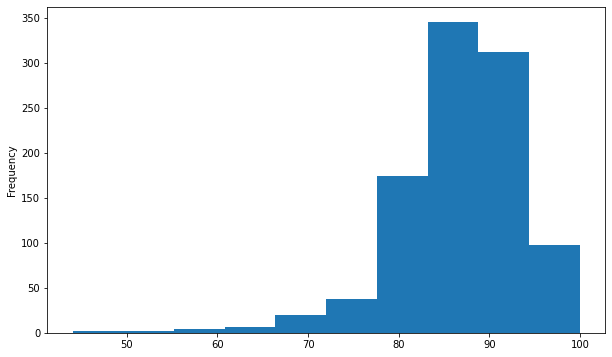

In [21]:
# autopct create %, start angle represent starting point
df19['% Cited'].plot(kind='hist', figsize=(10, 6))

plt.show()


In [22]:
mostfield_df = df19e.nlargest(5,'CiteScore')
mostfield_df

,Source title,CiteScore,Highest percentile,2016-19 Citations,2016-19 Documents,% Cited,SNIP,SJR,Publisher,FieldID
Field,,,,,,,,,,
Oncology,Ca-A Cancer Journal for Clinicians,435.4,99.0%,47455,109,94,113.744,88.192,Wiley-Blackwell,1/331
Health (social science),MMWR Recommendations and Reports,152.5,99.0%,2288,15,87,37.543,41.022,Centers for Disease Control and Prevention (CDC),1/275
Materials Chemistry,Nature Reviews Materials,123.7,99.0%,23868,193,96,15.261,36.691,Springer Nature,1/287
General Chemistry,Chemical Reviews,100.5,99.0%,97295,968,96,12.832,20.847,American Chemical Society,1/398
General Physics and Astronomy,Reviews of Modern Physics,75.8,99.0%,11906,157,92,14.948,21.938,American Physical Society,1/224


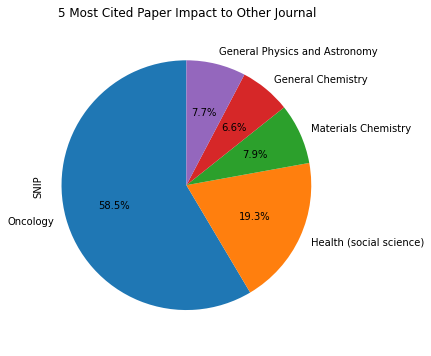

In [23]:
# autopct create %, start angle represent starting point
mostfield_df['SNIP'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            )

plt.title('5 Most Cited Paper Impact to Other Journal')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### Berdasarkan data tersebut dapat disimpulkan bahwa bidang Oncology/Penyakit dalam memiliki bidang jurnal yang berpengaruh terhadap penulisan jurnal-jurnal berikutnya.

In [24]:
df_fieldiden = df19e.drop(columns=['Source title','Highest percentile','2016-19 Citations','2016-19 Documents','% Cited','SJR','Publisher','FieldID'])

In [25]:
mostfield01_df = df_fieldiden.nlargest(10,'CiteScore')
df_fieldiden.head()

,CiteScore,SNIP
Field,,
Oncology,435.4,113.744
Health (social science),152.5,37.543
Materials Chemistry,123.7,15.261
General Chemistry,100.5,12.832
General Physics and Astronomy,75.8,14.948


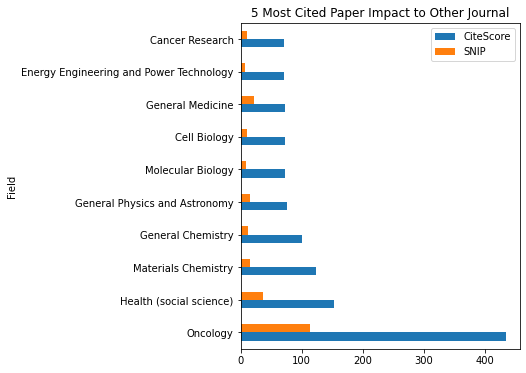

In [26]:
# autopct create %, start angle represent starting point
mostfield01_df.plot.barh(figsize=(5, 6))

plt.title('5 Most Cited Paper Impact to Other Journal')

plt.show()

### Berdasarkan nilai sitasi dan pengaruh jurnal. Jurnal tentang ilmu medikal menjadi jurnal yang banyak dikutip dan palinng banyak berpenngaruh dalam jurnal bidang pengetahuan yang dibahas di tahun 2019.

In [27]:
train = df19e
test = df19e

In [28]:
X=train[['CiteScore', 'SNIP']]
y=train.SNIP
y=y.astype('int')

In [29]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [30]:
X.head()

,CiteScore,SNIP
Field,,
Oncology,435.4,113.744
Health (social science),152.5,37.543
Materials Chemistry,123.7,15.261
General Chemistry,100.5,12.832
General Physics and Astronomy,75.8,14.948


In [31]:
y.head()

Field
Oncology                         113
Health (social science)           37
Materials Chemistry               15
General Chemistry                 12
General Physics and Astronomy     14
Name: SNIP, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [33]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.92

In [34]:
#(a)LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.71

In [35]:
#(b)DECISION TREE ALGORITHM

from sklearn import tree

modeldt=tree.DecisionTreeClassifier(criterion='gini')

modeldt.fit(x_train,y_train)

y_pred = modeldt.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.985

In [36]:
#(c)RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier

modelrf=RandomForestClassifier()

modelrf.fit(x_train,y_train)

y_pred = modelrf.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.96

In [37]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

from sklearn import svm

modelsvm_model=svm.SVC()

modelsvm_model.fit(x_train,y_train)

y_pred = modelsvm_model.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.5

In [38]:
#(e)NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 

modelnb=GaussianNB()

modelnb.fit(x_train,y_train)

y_pred = modelnb.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.92

In [39]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

from sklearn.neighbors import KNeighborsClassifier

modelkNN=KNeighborsClassifier()

modelkNN.fit(x_train,y_train)

y_pred = modelkNN.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.84

### Berdasarkan metode prediksi yang coba diterapkan di atas, metode decision tree merupakan metode yang paling baik untuk menentukan prediksi, dengan nilai keakuratan 0.985.